In [1]:
import json
import pandas as pd
today = "2019-03-24"

In [2]:
import json
def read_json(filename):
    with open(filename, "r") as f:
        return json.load(f)

In [3]:
# list of arrays for each model.
# DIR = "./"
DIR = f"./out/{today}/"
DIR = f"out/{today}/out/"
cv_results = {alg: read_json(DIR + f"{today}-{alg}-cv_results.json") for alg in ["hyperband", "hyperband-w-patience", "patience"]}

# list of arrays with each score/time/etc. Each model entered more than once.

# ordered by adaptive-ness
ALGS = [
    # "passive",
    "patience",
    "hyperband-w-patience",
    "hyperband",
]
histories = {alg: read_json(DIR + f"{today}-{alg}-history.json")for alg in ALGS}
params = {alg: read_json(DIR + f"{today}-{alg}-params.json") for alg in ALGS}

best = {alg: read_json(DIR + f"{today}-{alg}-best-params-and-score.json") for alg in ALGS}

In [4]:
history = histories["hyperband"]

In [5]:
from collections import defaultdict
# model_history = defaultdict(list)
# for datum in history:
#     model_history[datum["estimator_id"]].append(datum)

In [6]:
# Want: x=calls, y=score, row=bracket, color=model_id
df = pd.DataFrame(history)
df.head()

,bracket,elapsed_wall_time,estimator_id,params,partial_fit_calls,partial_fit_time,score,score_time
0,0,15.245532,bracket=0-0,"{'train_split': None, 'optimizer__weight_decay...",1,2.332337,-0.673221,1.230465
1,0,15.245533,bracket=0-1,"{'train_split': None, 'optimizer__weight_decay...",1,2.071613,-0.671016,1.306991
2,0,15.245534,bracket=0-2,"{'train_split': None, 'optimizer__weight_decay...",1,2.390669,-0.256124,1.224128
3,0,15.245534,bracket=0-3,"{'train_split': None, 'optimizer__weight_decay...",1,1.937984,-0.265498,1.050706
4,0,15.245535,bracket=0-4,"{'train_split': None, 'optimizer__weight_decay...",1,2.454094,-0.584804,1.222888


In [7]:
import altair as alt

In [8]:
i = df.score > -0.12
show = df[i]

/Users/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


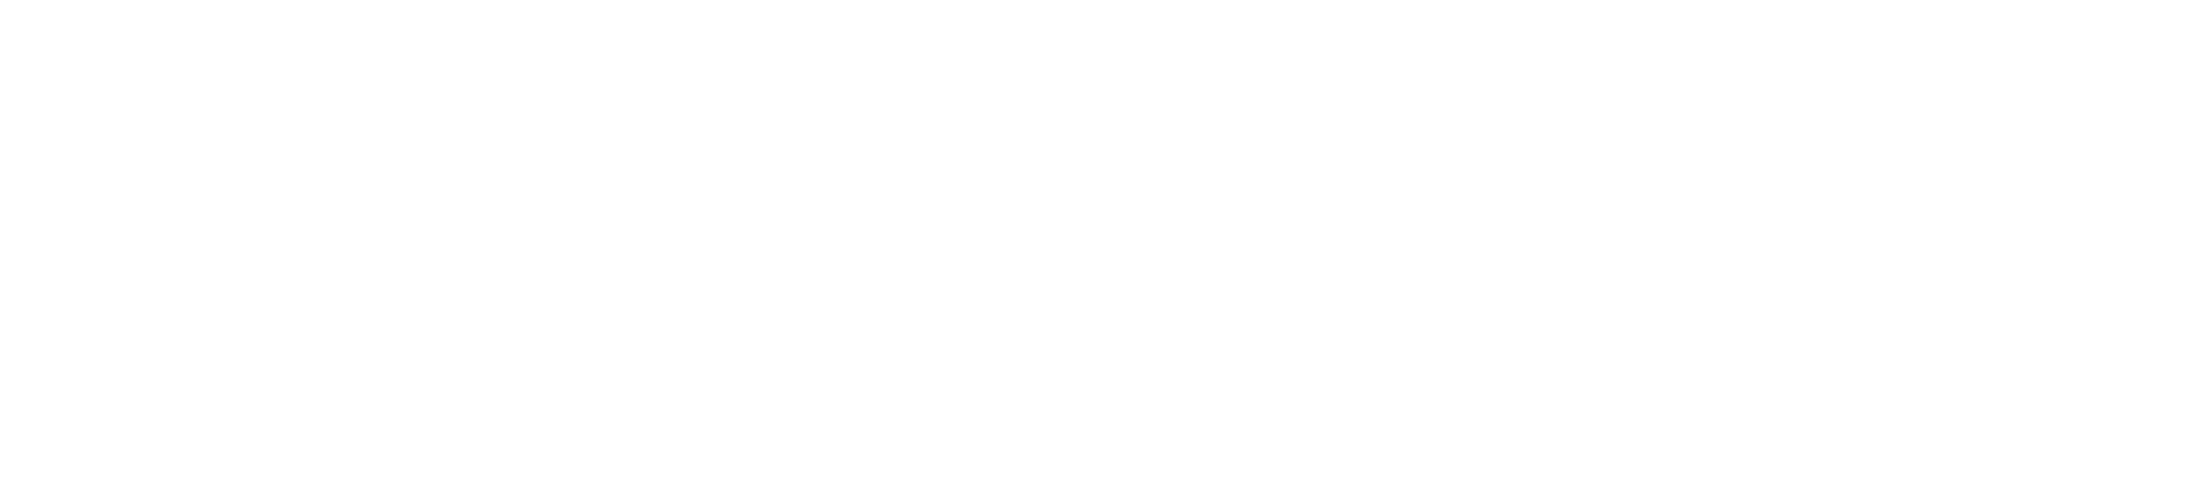

In [9]:
show["score_diff"] = df.score - (-0.9)
alt.Chart(show).mark_line().encode(
    x="partial_fit_calls",
    y=alt.Y("score", scale=alt.Scale(domain=(-0.09, -0.15), type="linear")),
    # y=alt.Y("score_diff", scale=alt.Scale(type="log")),
    color=alt.Color("estimator_id"),
    column="bracket",
)

In [10]:
i = df.bracket == 3
df[i]

,bracket,elapsed_wall_time,estimator_id,params,partial_fit_calls,partial_fit_time,score,score_time
20,3,18.954228,bracket=3-0,"{'train_split': None, 'optimizer__weight_decay...",1,2.284826,-0.269203,0.838441
21,3,18.954230,bracket=3-1,"{'train_split': None, 'optimizer__weight_decay...",1,2.433025,-0.191520,0.889453
22,3,18.954230,bracket=3-2,"{'train_split': None, 'optimizer__weight_decay...",1,2.105985,-0.675639,0.867124
23,3,18.954231,bracket=3-3,"{'train_split': None, 'optimizer__weight_decay...",1,2.088357,-0.266896,0.778886
24,3,18.954231,bracket=3-4,"{'train_split': None, 'optimizer__weight_decay...",1,2.621713,-0.263591,1.268707
25,3,18.954232,bracket=3-5,"{'train_split': None, 'optimizer__weight_decay...",1,2.742043,-0.246127,0.898901
26,3,18.954232,bracket=3-6,"{'train_split': None, 'optimizer__weight_decay...",1,2.088064,-0.442870,0.922914
27,3,18.954232,bracket=3-7,"{'train_split': None, 'optimizer__weight_decay...",1,2.384025,-0.256843,0.998385
28,3,18.954233,bracket=3-8,"{'train_split': None, 'optimizer__weight_decay...",1,1.986581,-0.265830,0.990782
29,3,18.954233,bracket=3-9,"{'train_split': None, 'optimizer__weight_decay...",1,2.070257,-0.358553,1.075384


In [ ]:
i = 
df[]